In [1]:
%matplotlib inline
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# load the dataset
# df = pd.read_csv(r'D:\Final Year Project\final project\Dataset-1.csv')
# df = pd.read_csv(r'D:\Final Year Project\final project\Dataset (Original).csv')
df = pd.read_csv(r'D:\Final Year Project\final project\Dataset (Original1).csv') #longitude and latitude are remove
df.head()


,NDVI,Max Temp,Ave Temp,Min Temp,Ave Humidity,Rainfall,Crop_Type
0,0.2518,1.705882,-1.476471,-5.411765,85.888235,1.673529,corn
1,0.3869,1.705882,-1.476471,-5.411765,85.888235,1.673529,corn
2,0.2607,7.857143,1.678571,-4.142857,77.725000,0.516786,corn
3,0.2353,7.857143,1.678571,-4.142857,77.725000,0.516786,corn
4,0.2536,6.576923,2.757692,-1.153846,74.657692,1.993077,corn


In [3]:
#check the dimension of dataset
df.shape

(1048575, 7)

In [4]:
# delete duplicate rows
df.drop_duplicates(inplace=True)

In [5]:
#check the dimension of dataset
df.shape

(236670, 7)

In [6]:
df.describe()

,NDVI,Max Temp,Ave Temp,Min Temp,Ave Humidity,Rainfall
count,236646.000000,236670.000000,236670.000000,236670.000000,236670.000000,236670.000000
mean,0.405153,18.435591,13.418899,8.266095,68.126936,1.705585
std,0.225452,9.339313,9.012335,8.983647,15.411030,1.587582
min,-0.192100,-14.708333,-9.266667,-10.083333,-56.762500,-0.190833
25%,0.243800,11.774194,4.848387,-0.903226,64.080645,0.314800
50%,0.361400,20.548387,14.838710,8.870968,70.741935,1.286452
75%,0.557500,25.545455,21.538710,15.233333,75.676000,2.506333
max,0.994000,31.500000,27.479167,23.625000,86.613636,6.825161


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236670 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NDVI          236646 non-null  float64
 1   Max Temp      236670 non-null  float64
 2   Ave Temp      236670 non-null  float64
 3   Min Temp      236670 non-null  float64
 4   Ave Humidity  236670 non-null  float64
 5   Rainfall      236670 non-null  float64
 6   Crop_Type     236670 non-null  object 
dtypes: float64(6), object(1)
memory usage: 14.4+ MB


In [8]:
#to clean the data we use this function
df=df.dropna()

In [9]:
# prepare the training set
# X  is feature columns except the last column which is output
X=df.iloc[:, :-1]
# y is output values
y=df.iloc[:,-1]
print("Values of features means X\n",X)
print("Values of output means y\n",y)


Values of features means X
            NDVI   Max Temp   Ave Temp  Min Temp  Ave Humidity  Rainfall
0        0.2518   1.705882  -1.476471 -5.411765     85.888235  1.673529
1        0.3869   1.705882  -1.476471 -5.411765     85.888235  1.673529
2        0.2607   7.857143   1.678571 -4.142857     77.725000  0.516786
3        0.2353   7.857143   1.678571 -4.142857     77.725000  0.516786
4        0.2536   6.576923   2.757692 -1.153846     74.657692  1.993077
...         ...        ...        ...       ...           ...       ...
1048568  0.1601  12.000000   7.858065  4.225806     75.577419  3.589032
1048569 -0.0153  12.000000   7.858065  4.225806     75.577419  3.589032
1048571 -0.0592  15.838710  10.909677  6.322581     70.983871  6.825161
1048573  0.2263  18.821429  13.078571  7.714286     63.475000  1.696071
1048574  0.2369  19.419355  13.974194  8.870968     58.135484  2.195806

[236646 rows x 6 columns]
Values of output means y
 0             corn
1             corn
2             cor

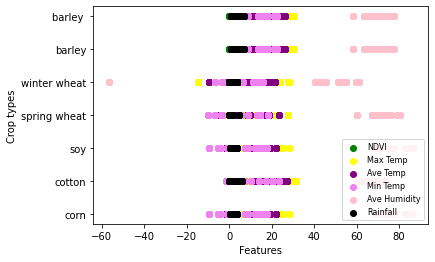

In [10]:
#plot the each feature with output crop
plt.xlabel('Features')
plt.ylabel('Crop types')

# pltX=df.loc[:,'longitude']
# pltY=df.loc[:,'Crop_Type']
# plt.scatter(pltX,pltY, color='blue' ,label='longitude')

# pltX=df.loc[:,'latitude']
# pltY=df.loc[:,'Crop_Type']
# plt.scatter(pltX,pltY, color='red' ,label='latitude')

pltX=df.loc[:,'NDVI']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='green' ,label='NDVI')

pltX=df.loc[:,'Max Temp']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='yellow' ,label='Max Temp')

pltX=df.loc[:,'Ave Temp']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='purple' ,label='Ave Temp')

pltX=df.loc[:,'Min Temp']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='violet' ,label='Min Temp')

pltX=df.loc[:,'Ave Humidity']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='pink' ,label='Ave Humidity')


pltX=df.loc[:,'Rainfall']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='black' ,label='Rainfall')

plt.legend(loc=4,prop={'size':8})
plt.show()

In [11]:
#slipt the data into training data(75%) and test data(25%)
df= df.to_numpy()
#converting the dataset pandas to numpy array ndarray
print("this is dataset after converting the pandas to numpy \n",df)
print("This is data type of our dataset\n",type(df))
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

this is dataset after converting the pandas to numpy 
 [[0.2518 1.705882353 -1.476470588 ... 85.88823529 1.673529412 'corn']
 [0.3869 1.705882353 -1.476470588 ... 85.88823529 1.673529412 'corn']
 [0.2607 7.857142857 1.678571429 ... 77.725 0.516785714 'corn']
 ...
 [-0.0592 15.83870968 10.90967742 ... 70.98387097 6.82516129 'barley ']
 [0.2263 18.82142857 13.07857143 ... 63.475 1.696071429 'barley ']
 [0.2369 19.41935484 13.97419355 ... 58.13548387 2.195806452 'barley ']]
This is data type of our dataset
 <class 'numpy.ndarray'>


In [12]:
#train the model
model = KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier()

In [13]:
#test the model
predictions=model.predict(x_test)
#check precision,recall,f1 score
print(classification_report(y_test,predictions))
# check the accuracy of algorithms
print("Accuracy of algorithms Gradian Boost Classifier :\n",accuracy_score(y_test,predictions)*100)
# print(predictions),predictiaons
# print(y_test)

              precision    recall  f1-score   support

      barley       0.63      0.75      0.69      4084
     barley        0.27      0.17      0.20      2183
        corn       0.33      0.32      0.33      9878
      cotton       1.00      1.00      1.00     13336
         soy       0.37      0.38      0.38     10558
spring wheat       1.00      1.00      1.00     10797
winter wheat       1.00      1.00      1.00      8326

    accuracy                           0.73     59162
   macro avg       0.66      0.66      0.66     59162
weighted avg       0.72      0.73      0.73     59162

Accuracy of algorithms Gradian Boost Classifier :
 72.83729420912071
